In [4]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [66]:
palette_blue = [(48/255.0, 112/255.0, 173/255.0), (48/255.0, 112/255.0, 173/255.0)]#), (195/255.0, 64/255.0, 129/255.0)] 
palette_red = [(195/255.0, 64/255.0, 129/255.0)]#, (195/255.0, 64/255.0, 129/255.0)] 

def plot_graph(df, outpath):
    plt.clf()
    df_sim = df[df.bound == 'simulation']
    df_bd = df[df.bound != 'simulation']
    if len(df_sim) == 0:
        return
    print(df_sim)
    #return
    
    
    sns.lineplot(x="rates", y="exp_inf_frac", lw=1, palette=palette_red,
                 data=df_sim, alpha=0.8, err_style='band', ci=95, hue='bound', ls='--')
    
    sns.lineplot(x="rates", y="exp_inf_frac", lw=1, palette=palette_blue,
             data=df_bd, alpha=1.0, err_style='bars', ci=95, hue='bound')
    
    plt.xlabel('Time', fontsize=23)
    plt.ylabel('Prevalence', fontsize=23)
    (plt.gca()).set_xscale('log')
    #plt.ylim(0.0, 1.0)
    #plt.xlim(0.0, 10.0)
    #plt.xticks([int(v) for v in range(11)], [str(v) for v in range(11)])
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    #(plt.gca()).legend(fontsize = 20, \
     #              bbox_to_anchor= (1.0, 1), \
     #              title="Node-State", \
     #              title_fontsize = 15, \
     #              shadow = False, \
     #              frameon = False, \
     #              facecolor = 'white')
    #plt.legend(frameon=False)
    

    ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.title(outpath.replace('.pdf', ''))

    plt.plot()
    plt.savefig(outpath, bbox_inches='tight')

output/WSgraph_1000000.csv
output/BAgraph_1000000.csv
output/BAgraph_10000.csv
output/ERgraph_10000.csv
output/ERgraph_1000000.csv
output/WSgraph_10000.csv
output/ERgraph_100.csv
        rates  exp_inf_frac       bound
2000    0.001          0.01  simulation
2001    0.001          0.01  simulation
2002    0.001          0.01  simulation
2003    0.001          0.01  simulation
2004    0.001          0.01  simulation
...       ...           ...         ...
11995  10.000          0.98  simulation
11996  10.000          0.98  simulation
11997  10.000          1.00  simulation
11998  10.000          0.99  simulation
11999  10.000          0.99  simulation

[10000 rows x 3 columns]
output/WSgraph_100.csv
        rates  exp_inf_frac       bound
2000    0.001          0.01  simulation
2001    0.001          0.01  simulation
2002    0.001          0.01  simulation
2003    0.001          0.01  simulation
2004    0.001          0.01  simulation
...       ...           ...         ...
11995  10.00

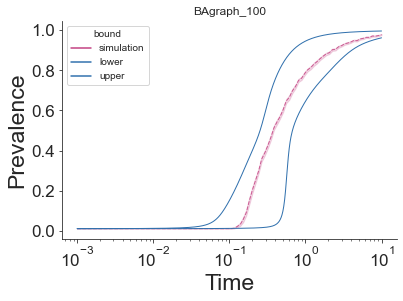

In [67]:
for file in glob.glob('output/*.csv'):
    print(file)
    df = pd.read_csv(file)
    plot_graph(df, file.split('/')[-1].replace('.csv', '.pdf'))